<a href="https://colab.research.google.com/github/Lmagalhaesf/Explorando-dados-do-COVID-internet-/blob/master/data/Explorando_Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
from sklearn.linear_model import LinearRegression 
import numpy as np 
from sklearn.preprocessing import LabelEncoder 
from matplotlib import pyplot
import numpy

In [3]:
dados = pd.read_excel('Covid.xlsx')

In [160]:
dados

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125,0,0,0,0,NaN,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125,1,1,0,0,NaN,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125,1,0,0,0,NaN,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125,1,0,0,0,NaN,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125,2,1,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413051,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-06-14,25,3015268,22871,912,304,11,NaN,NaN
413052,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-06-15,25,3015268,23684,813,319,15,NaN,NaN
413053,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-06-16,25,3015268,25380,1696,348,29,NaN,NaN
413054,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-06-17,25,3015268,27140,1760,365,17,NaN,NaN


In [170]:
dados.head(100)

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125,0,0,0,0,NaN,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125,1,1,0,0,NaN,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125,1,0,0,0,NaN,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125,1,0,0,0,NaN,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125,2,1,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-05-30,22,210147125,498440,33274,28834,956,200892.0,268714.0
96,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-05-31,23,210147125,514200,15760,29314,480,206555.0,278331.0
97,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-06-01,23,210147125,526447,12247,29937,623,211080.0,285430.0
98,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-06-02,23,210147125,555383,28936,31199,1262,223638.0,300546.0


In [236]:
dados.iloc[32]

regiao                                Brasil
estado                                     0
municipio                                  0
coduf                                     76
codmun                                     0
codRegiaoSaude                             0
nomeRegiaoSaude                            0
data                     2020-03-28 00:00:00
semanaEpi                                 13
populacaoTCU2019                   210147125
casosAcumulado                          3903
casosNovos                               486
obitosAcumulado                          114
obitosNovos                               22
Recuperadosnovos                           0
emAcompanhamentoNovos                      0
Name: 32, dtype: object

In [270]:
dados.describe()

,coduf,codmun,codRegiaoSaude,semanaEpi,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos
count,413056.000000,413056.000000,413056.000000,413056.000000,413056.000000,413056.000000,413056.000000,413056.000000,413056.000000,413056.000000
mean,31.853671,317605.788774,31522.255355,19.197024,164.175586,7.104184,9.279170,0.346791,23.020975,27.746957
std,9.903249,102255.471433,10372.937677,3.498637,5951.496045,234.026285,329.792704,10.961647,2466.881221,2890.325945
min,11.000000,0.000000,0.000000,9.000000,0.000000,-1370.000000,0.000000,-36.000000,0.000000,0.000000
25%,25.000000,250118.750000,25001.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,31.000000,313470.000000,31040.000000,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,41.000000,411150.000000,41010.000000,22.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,76.000000,530010.000000,53001.000000,25.000000,978142.000000,34918.000000,47748.000000,1473.000000,482102.000000,448292.000000


In [189]:
#contando os valores iguais da coluna data
dados['data'].value_counts()

2020-05-18    4907
2020-05-15    4907
2020-06-10    4907
2020-04-26    4907
2020-05-03    4907
              ... 
2020-03-25      28
2020-03-11      28
2020-02-28      28
2020-03-26      28
2020-02-26      28
Name: data, Length: 115, dtype: int64

In [195]:
#pegando as linhas referentes a data 2020-06-10
datae=dados.loc[dados['data']=='2020-06-10']
datae

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos
106,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-06-10,24,210147125,772416,32913,39680,1274,325395.0,407341.0
221,Norte,RO,NaN,11,NaN,NaN,NaN,2020-06-10,24,1777225,9850,630,267,12,NaN,NaN
336,Norte,AC,NaN,12,NaN,NaN,NaN,2020-06-10,24,881935,8746,289,237,14,NaN,NaN
451,Norte,AM,NaN,13,NaN,NaN,NaN,2020-06-10,24,4144597,52849,1615,2363,48,NaN,NaN
566,Norte,RR,NaN,14,NaN,NaN,NaN,2020-06-10,24,605761,6347,291,182,14,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412711,Centro-Oeste,GO,Valparaíso de Goiás,52,522185.0,52004.0,ENTORNO SUL,2020-06-10,24,168468,223,24,6,2,NaN,NaN
412795,Centro-Oeste,GO,Vianópolis,52,522200.0,52002.0,CENTRO SUL,2020-06-10,24,13863,14,1,0,0,NaN,NaN
412879,Centro-Oeste,GO,Vicentinópolis,52,522205.0,52002.0,CENTRO SUL,2020-06-10,24,8743,0,0,0,0,NaN,NaN
412963,Centro-Oeste,GO,Vila Boa,52,522220.0,52003.0,ENTORNO NORTE,2020-06-10,24,6171,0,0,0,0,NaN,NaN


In [207]:
#retirando as linhas referentes ao estado DF
datae = datae.loc[datae['estado']!='DF']
datae

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos
106,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-06-10,24,210147125,772416,32913,39680,1274,325395.0,407341.0
221,Norte,RO,NaN,11,NaN,NaN,NaN,2020-06-10,24,1777225,9850,630,267,12,NaN,NaN
336,Norte,AC,NaN,12,NaN,NaN,NaN,2020-06-10,24,881935,8746,289,237,14,NaN,NaN
451,Norte,AM,NaN,13,NaN,NaN,NaN,2020-06-10,24,4144597,52849,1615,2363,48,NaN,NaN
566,Norte,RR,NaN,14,NaN,NaN,NaN,2020-06-10,24,605761,6347,291,182,14,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412627,Centro-Oeste,GO,Urutaí,52,522180.0,52005.0,ESTRADA DE FERRO,2020-06-10,24,3072,2,0,0,0,NaN,NaN
412711,Centro-Oeste,GO,Valparaíso de Goiás,52,522185.0,52004.0,ENTORNO SUL,2020-06-10,24,168468,223,24,6,2,NaN,NaN
412795,Centro-Oeste,GO,Vianópolis,52,522200.0,52002.0,CENTRO SUL,2020-06-10,24,13863,14,1,0,0,NaN,NaN
412879,Centro-Oeste,GO,Vicentinópolis,52,522205.0,52002.0,CENTRO SUL,2020-06-10,24,8743,0,0,0,0,NaN,NaN


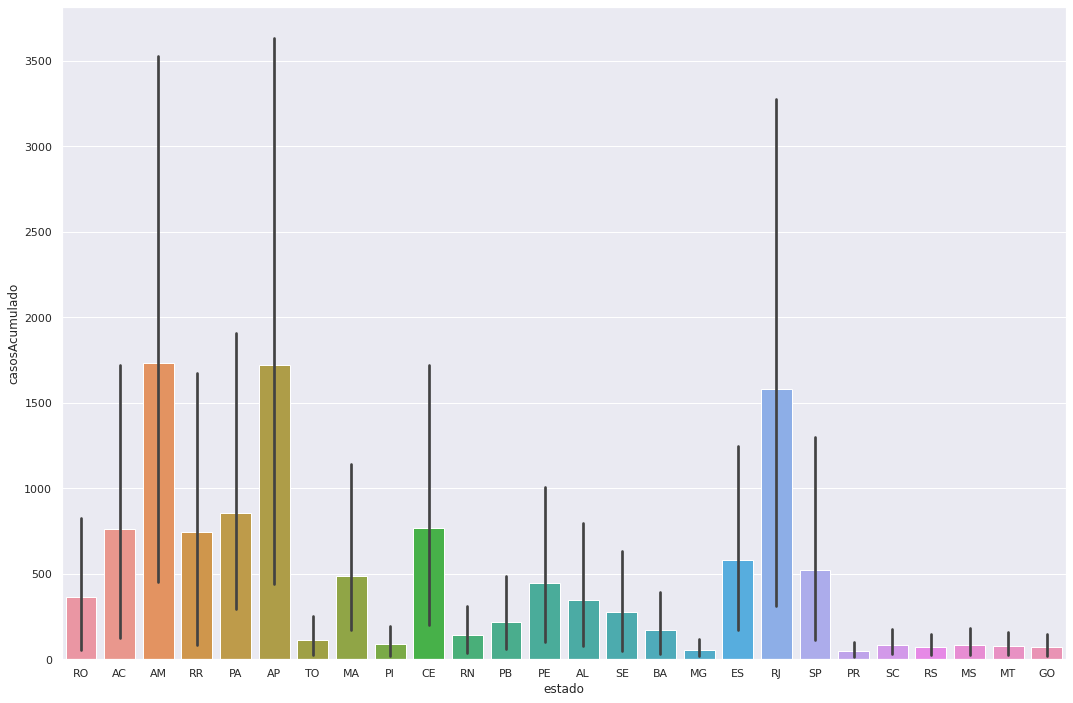

In [208]:
#fazendo um plot dos casos de COVID por estados
sns.set(rc={'figure.figsize':(18,12)})
sns.barplot(x='estado', y='casosAcumulado', data=datae,)

In [249]:
#preenchendo os valores ausentes com 0
dados = dados.fillna(0)
dados.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos
0,Brasil,0,0,76,0.0,0.0,0,2020-02-25,9,210147125,0,0,0,0,0.0,0.0
1,Brasil,0,0,76,0.0,0.0,0,2020-02-26,9,210147125,1,1,0,0,0.0,0.0
2,Brasil,0,0,76,0.0,0.0,0,2020-02-27,9,210147125,1,0,0,0,0.0,0.0
3,Brasil,0,0,76,0.0,0.0,0,2020-02-28,9,210147125,1,0,0,0,0.0,0.0
4,Brasil,0,0,76,0.0,0.0,0,2020-02-29,9,210147125,2,1,0,0,0.0,0.0


In [228]:
# retirando linhas
dados2 = dados2.loc[dados2['casosAcumulado']!=0]

In [250]:
#retirando as linhas que contém DF
dados2 = dados2.loc[dados2['estado']!='DF']
dados2

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos
139,Norte,RO,0,11,0.0,0.0,0,2020-03-20,12,1777225,1,1,0,0,0.0,0.0
140,Norte,RO,0,11,0.0,0.0,0,2020-03-21,12,1777225,1,0,0,0,0.0,0.0
141,Norte,RO,0,11,0.0,0.0,0,2020-03-22,13,1777225,3,2,0,0,0.0,0.0
142,Norte,RO,0,11,0.0,0.0,0,2020-03-23,13,1777225,3,0,0,0,0.0,0.0
143,Norte,RO,0,11,0.0,0.0,0,2020-03-24,13,1777225,3,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412884,Centro-Oeste,GO,Vicentinópolis,52,522205.0,52002.0,CENTRO SUL,2020-06-15,25,8743,1,0,1,0,0.0,0.0
412885,Centro-Oeste,GO,Vicentinópolis,52,522205.0,52002.0,CENTRO SUL,2020-06-16,25,8743,1,0,1,0,0.0,0.0
412886,Centro-Oeste,GO,Vicentinópolis,52,522205.0,52002.0,CENTRO SUL,2020-06-17,25,8743,1,0,1,0,0.0,0.0
412887,Centro-Oeste,GO,Vicentinópolis,52,522205.0,52002.0,CENTRO SUL,2020-06-18,25,8743,1,0,1,0,0.0,0.0


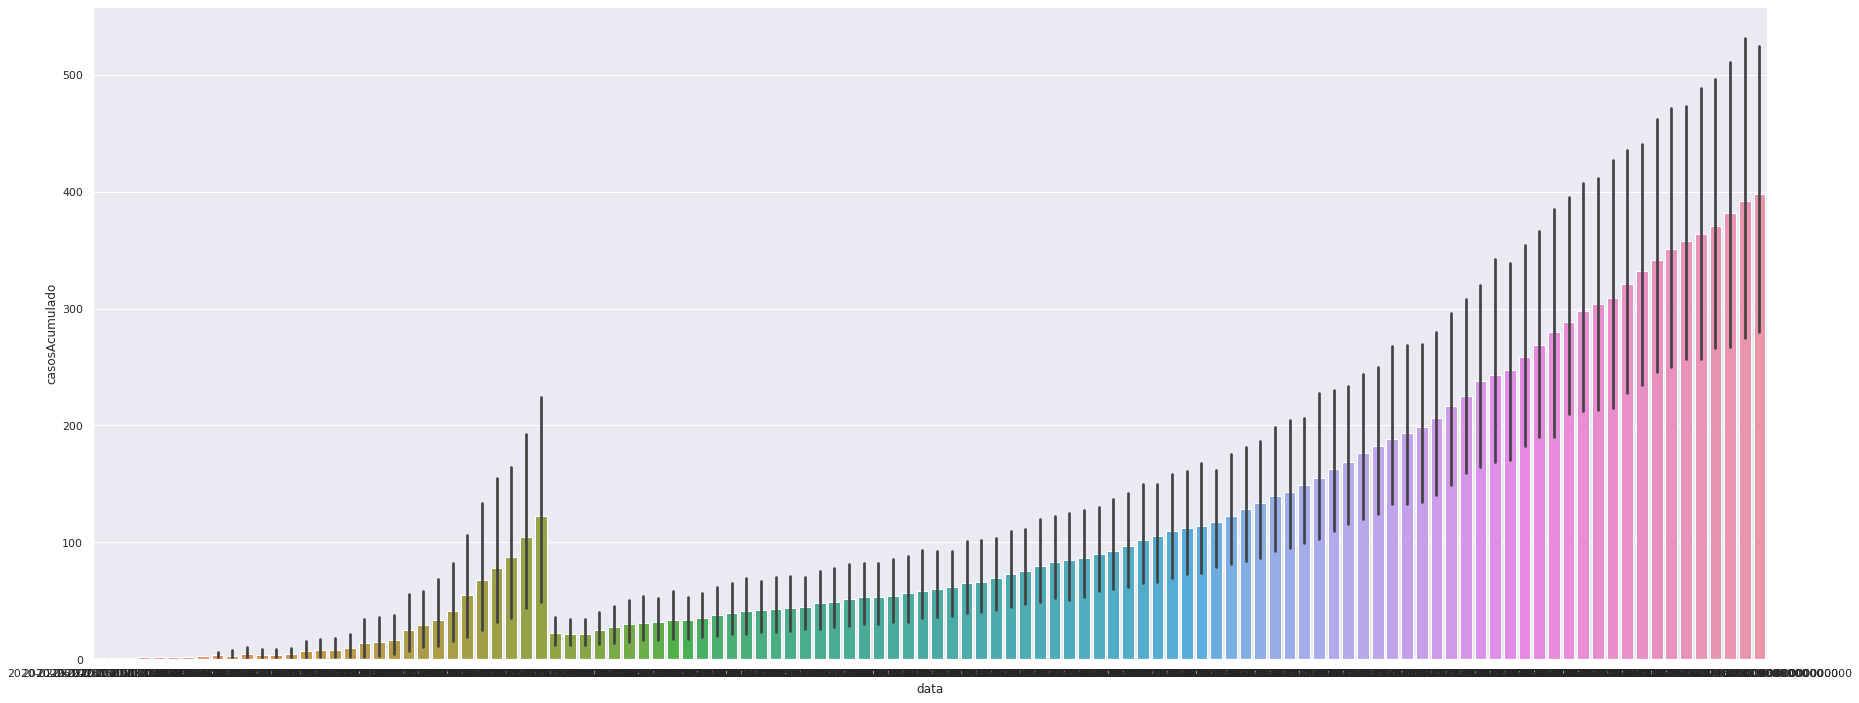

In [273]:
# gráfico de data por casos acumulados
sns.set(rc={'figure.figsize':(30,12)})
sns.barplot(x='data', y='casosAcumulado', data=dados2,)

Text(0, 0.5, 'Casos novos')

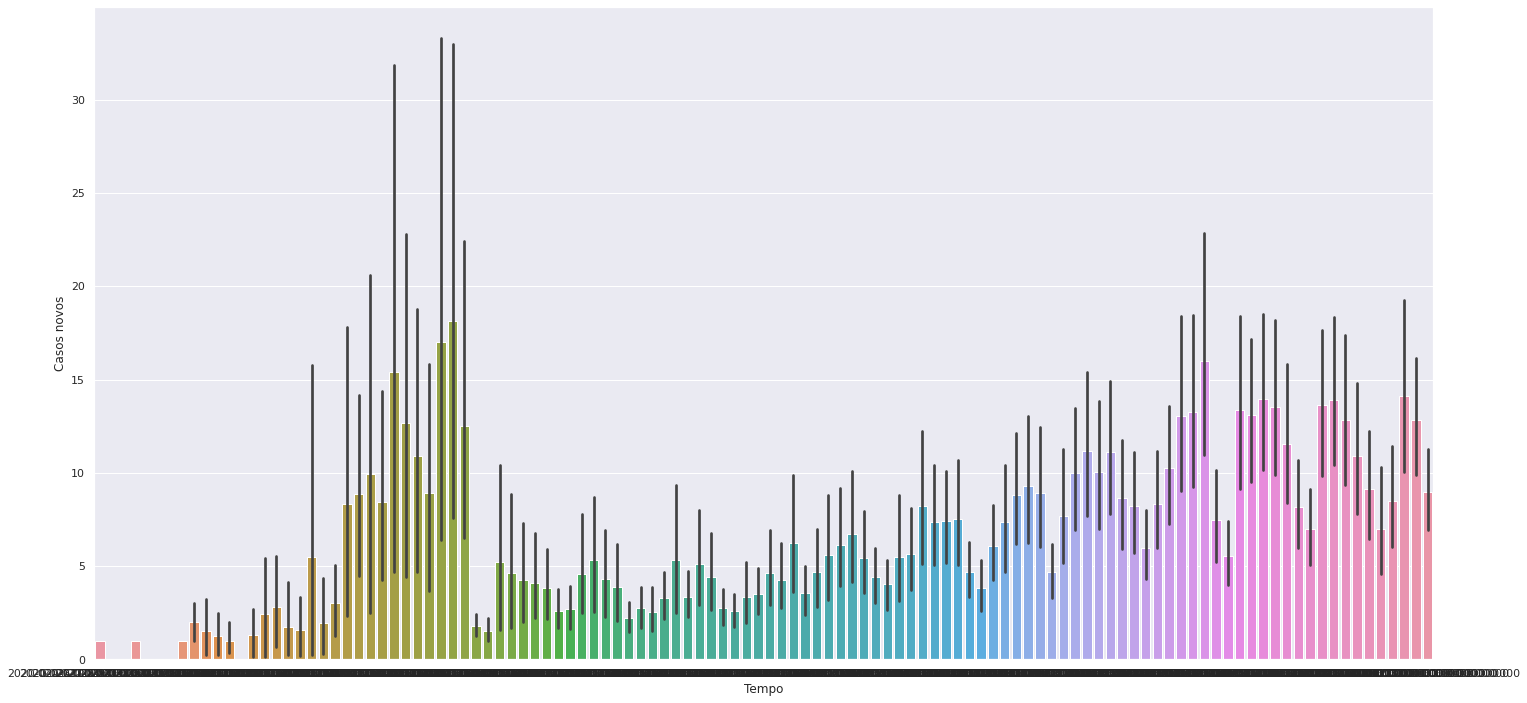

In [252]:
#relação de novos casos com o tempo
sns.set(rc={'figure.figsize':(24,12)})
sns.barplot(x='data', y='casosNovos', data=dados2,)
plt.xlabel('Tempo')
plt.ylabel('Casos novos')

In [5]:
dados.estado.unique()

array([nan, 'RO', 'AC', 'AM', 'RR', 'PA', 'AP', 'TO', 'MA', 'PI', 'CE',
       'RN', 'PB', 'PE', 'AL', 'SE', 'BA', 'MG', 'ES', 'RJ', 'SP', 'PR',
       'SC', 'RS', 'MS', 'MT', 'GO', 'DF'], dtype=object)

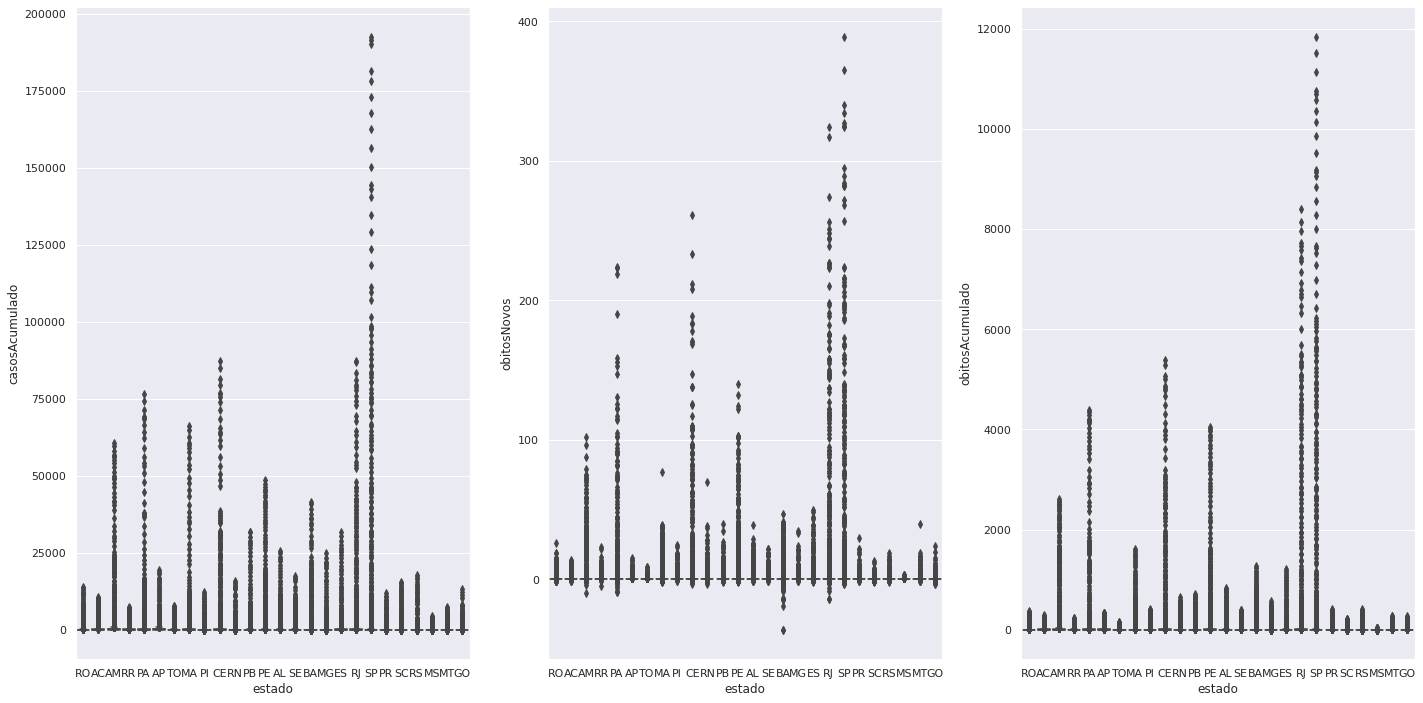

In [253]:
#gerando um gráfico de casos por estados
fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize=(24,12))

sns.boxplot(x='estado', y='casosAcumulado', data=dados2, ax=axis1)
sns.boxplot(x='estado', y='obitosNovos', data=dados2, ax=axis2)
sns.boxplot(x='estado', y='obitosAcumulado', data=dados2, ax=axis3);

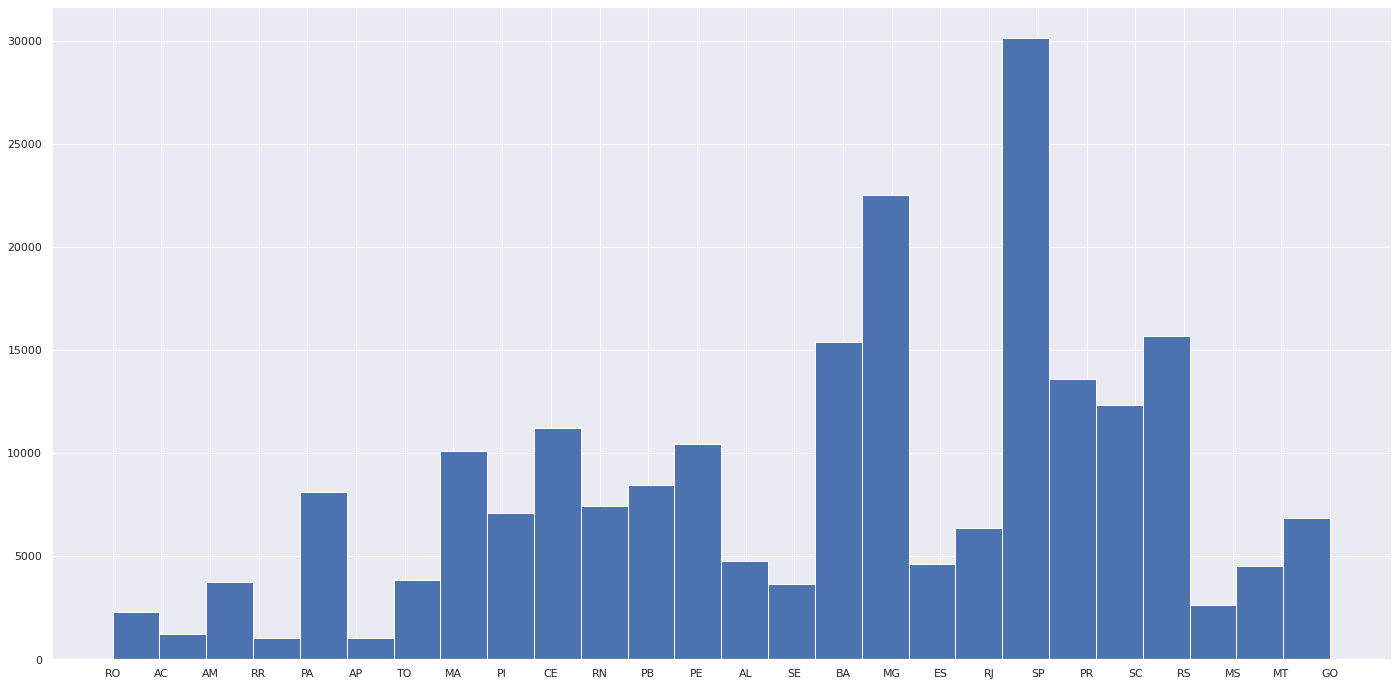

In [254]:
dados2['estado'].hist(bins=26)
pylab.rcParams['figure.figsize'] = (10.0, 8.0) #mudando tamanho do gráfico

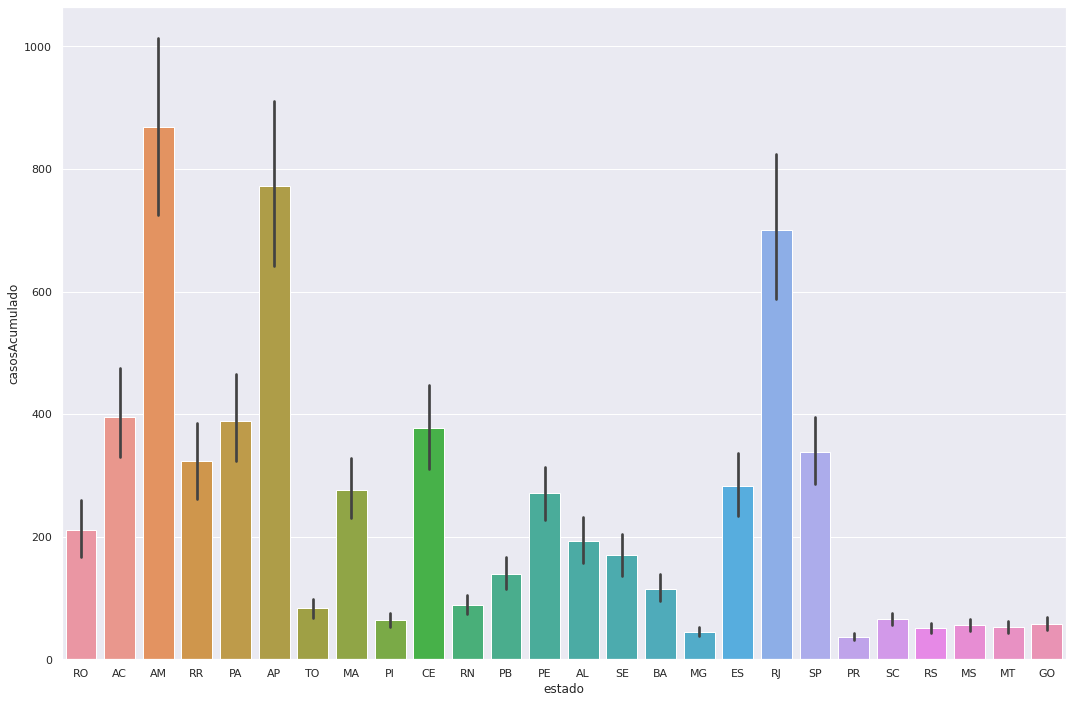

In [245]:
sns.set(rc={'figure.figsize':(18,12)})
sns.barplot(x='estado', y='casosAcumulado', data=dados2,)

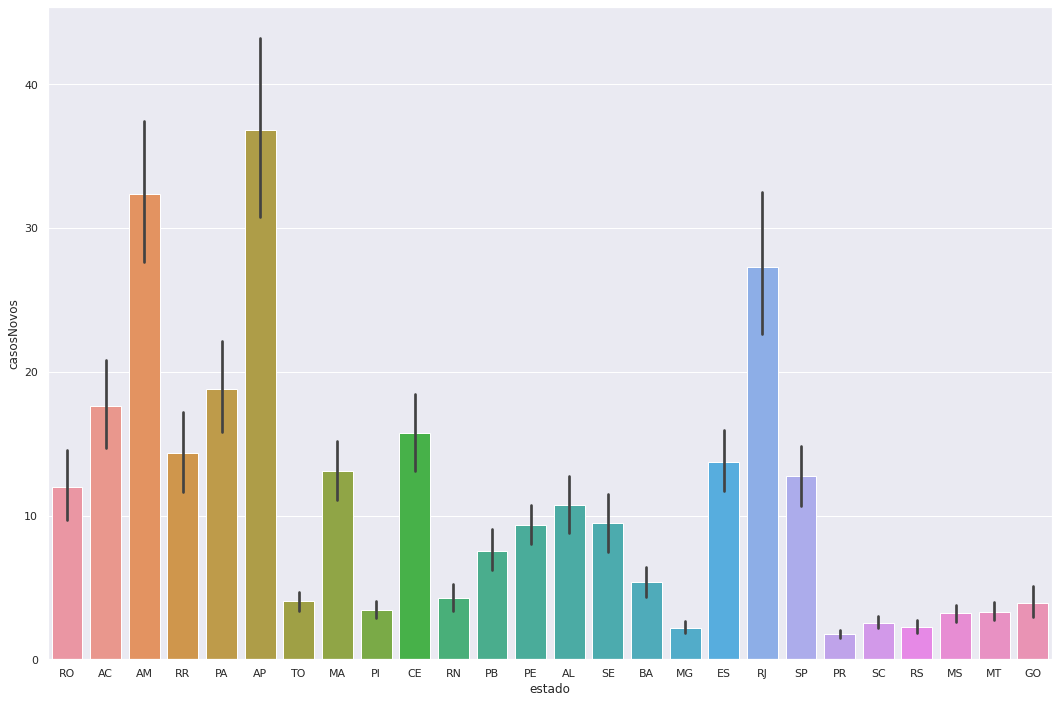

In [246]:
sns.set(rc={'figure.figsize':(18,12)})
sns.barplot(x='estado', y='casosNovos', data=dados2,)

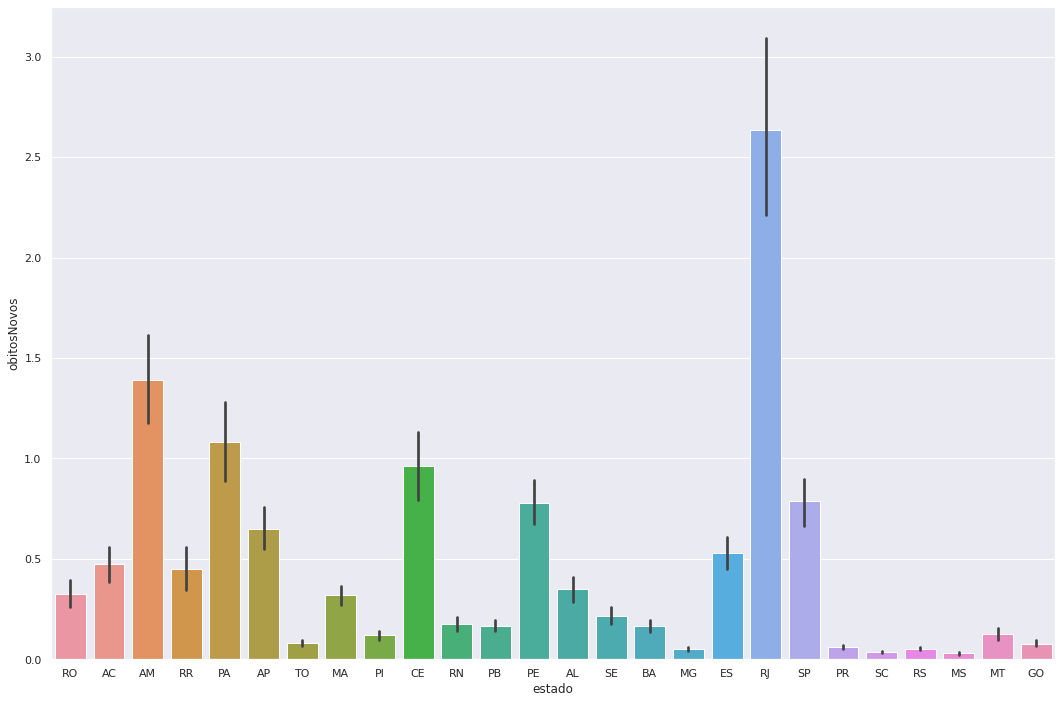

In [247]:
sns.set(rc={'figure.figsize':(18,12)})
sns.barplot(x='estado', y='obitosNovos', data=dados2,)

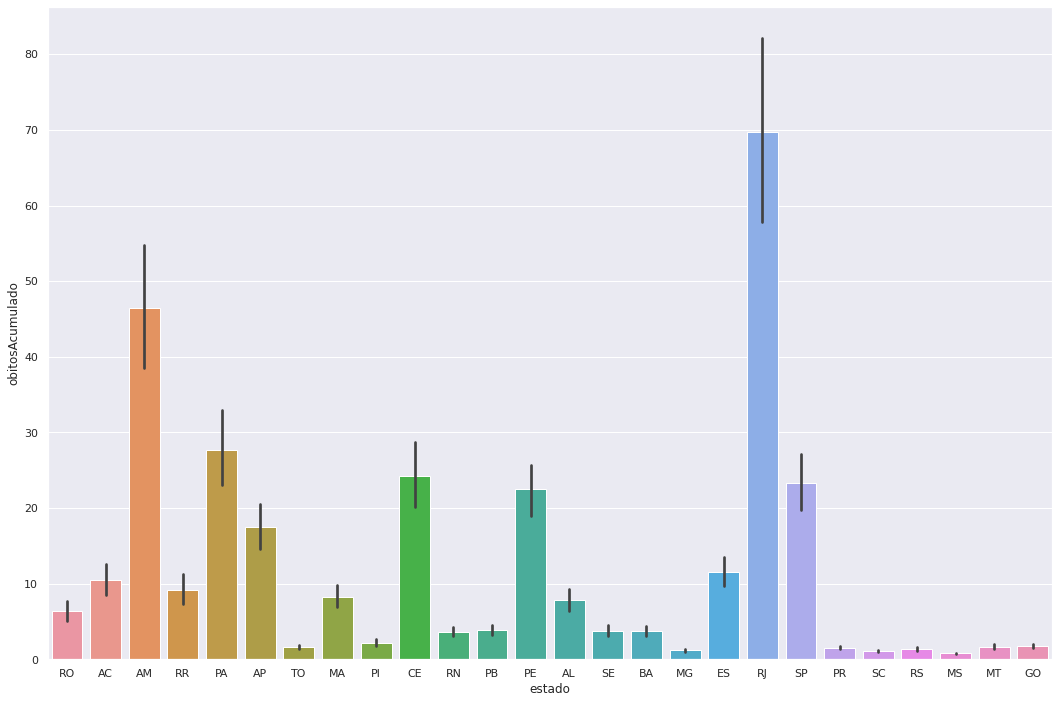

In [248]:
sns.set(rc={'figure.figsize':(18,12)})
sns.barplot(x='estado', y='obitosAcumulado', data=dados2,)

In [255]:
X = dados2.iloc[:, 10].values 
y = dados2.iloc[:, 11].values
correlacao = np.corrcoef(X, y) 
correlacao

array([[1.        , 0.84283017],
       [0.84283017, 1.        ]])

In [256]:
X = X.reshape(-1, 1) 
y = y.reshape(-1, 1) 

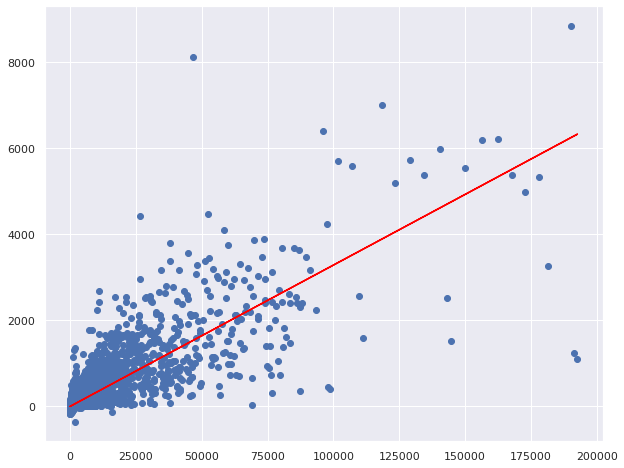

In [257]:
modelo = LinearRegression() 
modelo.fit(X, y) 
plt.scatter(X, y) #plotar a regressão 
plt.plot(X, modelo.predict(X), color = 'red') #plotar a linha da regressão 

In [258]:
modelo.coef_

array([[0.03279279]])

In [259]:
modelo.intercept_

array([2.06197814])

In [260]:
data= dados2.iloc[:,7].values

In [261]:
data

array(['2020-03-20T00:00:00.000000000', '2020-03-21T00:00:00.000000000',
       '2020-03-22T00:00:00.000000000', ...,
       '2020-06-17T00:00:00.000000000', '2020-06-18T00:00:00.000000000',
       '2020-06-18T00:00:00.000000000'], dtype='datetime64[ns]')

In [262]:
estado = dados.iloc[:,1].values 

In [263]:
estado

array([0, 0, 0, ..., 'DF', 'DF', 'DF'], dtype=object)

In [265]:
data

array(['2020-03-20T00:00:00.000000000', '2020-03-21T00:00:00.000000000',
       '2020-03-22T00:00:00.000000000', ...,
       '2020-06-17T00:00:00.000000000', '2020-06-18T00:00:00.000000000',
       '2020-06-18T00:00:00.000000000'], dtype='datetime64[ns]')

In [266]:
data = data.reshape(-1, 1)

Text(0, 0.5, 'Casos totais')

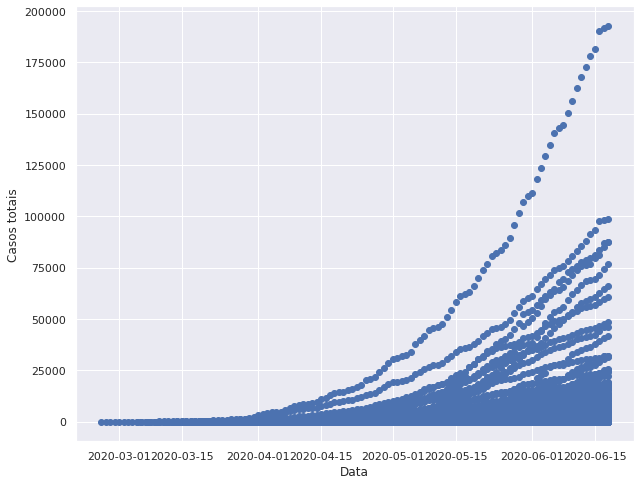

In [267]:
modelo = LinearRegression() 
modelo.fit(data, X) 
plt.scatter(data, X) #plotar a regressão
plt.xlabel('Data')
plt.ylabel('Casos totais')